# Concept

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

https://medium.com/@aidangomez/let-s-do-this-f9b699de31d9

**Simple LSTM for text classification**

https://www.kaggle.com/kredy10/simple-lstm-for-text-classification/comments

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),delimiter=',',encoding='latin-1')
# print(df.head())

In [ ]:
import io
df = pd.read_csv("/content/spam.csv",delimiter=',',encoding='latin-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/spam.csv",encoding='latin-1')
# df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Drop the columns that are not required for the neural network.
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

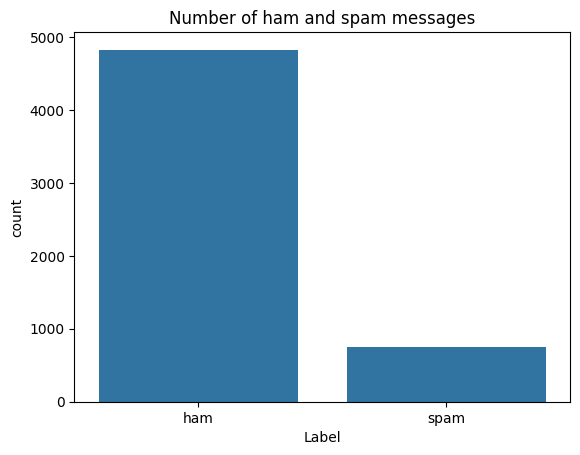

In [ ]:
# Understand the distribution better.
sns.countplot(data=df, x='v1')
plt.xlabel('Label')
plt.title('Number of ham and spam messages');

In [ ]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
df.v1.value_counts(normalize=True)*100

v1
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

Create input and output vectors.

Process the labels.

In [ ]:
X = df.v2
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
Y = df.v1
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
le.classes_
# ham=0, spam=1

array(['ham', 'spam'], dtype=object)

In [ ]:
Y.shape

(5572,)

In [ ]:
Y = Y.reshape(-1,1)
Y.shape

(5572, 1)

In [ ]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Split into training and test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, random_state=0)

In [ ]:
X_train.shape

(4736,)

In [ ]:
Y_train.shape

(4736, 1)

In [ ]:
X_test.shape

(836,)

In [ ]:
Y_test.shape

(836, 1)

In [ ]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
X_test

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
                              ...                        
4339    I want to sent  &lt;#&gt; mesages today. Thats...
4865    Oh! Shit, I thought that was your trip! Looooo...
2043    4mths half price Orange line rental & latest c...
3855                     I'm ok. Will do my part tomorrow
1034    ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
Name: v2, Length: 836, dtype: object

**Process the data**

Tokenize the data and convert the text to sequences.

Add padding to ensure that all the sequences have the same shape.

There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [ ]:
# Top 1000 frequently occurring words
max_words = 1000

# https://keras.io/api/preprocessing/text/
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
tok

In [ ]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
X_train[1]

'Ok lar... Joking wif u oni...'

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# Transforms each text in texts to a sequence of integers.
sequences = tok.texts_to_sequences(X_train)
sequences

[[261, 28, 3, 422, 10],
 [57, 165, 29, 5, 503, 5, 65, 845, 33, 42, 29, 39, 423],
 [40, 16, 30, 6, 70],
 [297, 303, 6],
 [33, 78, 604, 132, 61, 36, 6, 405],
 [37, 986, 5, 37, 670, 202],
 [1, 304, 40, 218, 161, 4, 15, 5, 211, 68],
 [846, 5, 92, 28, 4],
 [241, 847, 110, 463, 4, 251, 64],
 [85, 192, 120, 207, 293, 24, 322, 19, 28, 124, 987, 21],
 [36, 28, 63, 18, 988, 39, 165, 136, 118, 848, 7, 3, 252, 115, 136],
 [197, 7, 605, 88],
 [1, 16, 4, 566, 18, 849, 35, 36],
 [525, 343, 100, 22, 8, 351],
 [182, 750, 750],
 [129, 104, 266, 130, 3, 22, 315, 4, 57, 850],
 [45, 55, 1, 60, 89, 189, 6, 29],
 [989, 9, 785, 2, 54],
 [143, 567, 9, 483, 168, 606, 786, 483, 352, 19, 316, 24, 1, 637, 111, 25],
 [463,
  607,
  246,
  463,
  30,
  6,
  267,
  133,
  353,
  9,
  751,
  6,
  214,
  133,
  608,
  15,
  19,
  568,
  751,
  6,
  23,
  193,
  129,
  57,
  165,
  190,
  526],
 [484,
  6,
  42,
  19,
  164,
  8,
  23,
  118,
  29,
  78,
  29,
  911,
  10,
  214,
  6,
  484,
  5,
  1,
  277,
  21,
  280

In [ ]:
X_train[100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [ ]:
sequences[100]

[11, 113, 7, 1, 299, 214, 54, 175, 1, 56, 14, 339]

In [ ]:
for i in range(200):
  print(len(sequences[i]), end=" ")

5 13 5 3 8 6 10 5 7 12 15 4 8 6 3 10 8 5 16 27 29 13 10 8 21 16 7 13 6 9 9 8 19 12 10 6 18 42 5 31 18 20 11 7 24 22 11 4 9 15 14 4 6 6 9 3 5 30 13 6 10 10 22 5 16 5 21 21 8 10 10 1 4 18 20 8 17 10 6 13 9 8 6 34 4 5 1 13 20 4 15 3 9 6 10 15 30 13 11 42 12 6 5 5 6 14 3 11 7 5 13 19 27 7 6 12 20 5 29 23 25 13 6 16 19 18 0 14 12 4 25 11 5 20 25 27 11 23 28 12 17 4 2 11 14 3 1 30 31 15 8 10 9 26 23 6 4 26 20 11 33 7 11 5 5 8 26 7 10 20 12 8 10 29 10 9 3 7 5 15 6 6 8 27 25 4 3 9 13 10 39 7 9 14 18 11 16 24 14 7 

In [ ]:
len(sequences)

4736

In [ ]:
l = []
for i in range(len(sequences)):
  l.append(len(sequences[i]))
print(max(l), min(l))

171 0


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros
max_len = 150

from keras.utils import pad_sequences
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,   3, 422,  10],
       [  0,   0,   0, ...,  29,  39, 423],
       [  0,   0,   0, ...,  30,   6,  70],
       ...,
       [  0,   0,   0, ...,  82, 111,  21],
       [  0,   0,   0, ...,   4,  56,   3],
       [  0,   0,   0, ..., 282,   2,   3]], dtype=int32)

In [ ]:
sequences_matrix.shape

(4736, 150)

In [ ]:
for i in range(200):
  print(len(sequences_matrix[i]), end=" ")

150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 

In [ ]:
l = []
for i in range(len(sequences_matrix)):
  l.append(len(sequences_matrix[i]))
print(max(l), min(l))

150 150


**RNN**

Define the RNN structure.

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout

In [ ]:
def RNN():
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(max_words,50,input_length=max_len)(i)
    # https://keras.io/api/layers/core_layers/embedding/
    # https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
    x = LSTM(64)(x)
    # https://keras.io/api/layers/recurrent_layers/lstm/
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x)
    return model

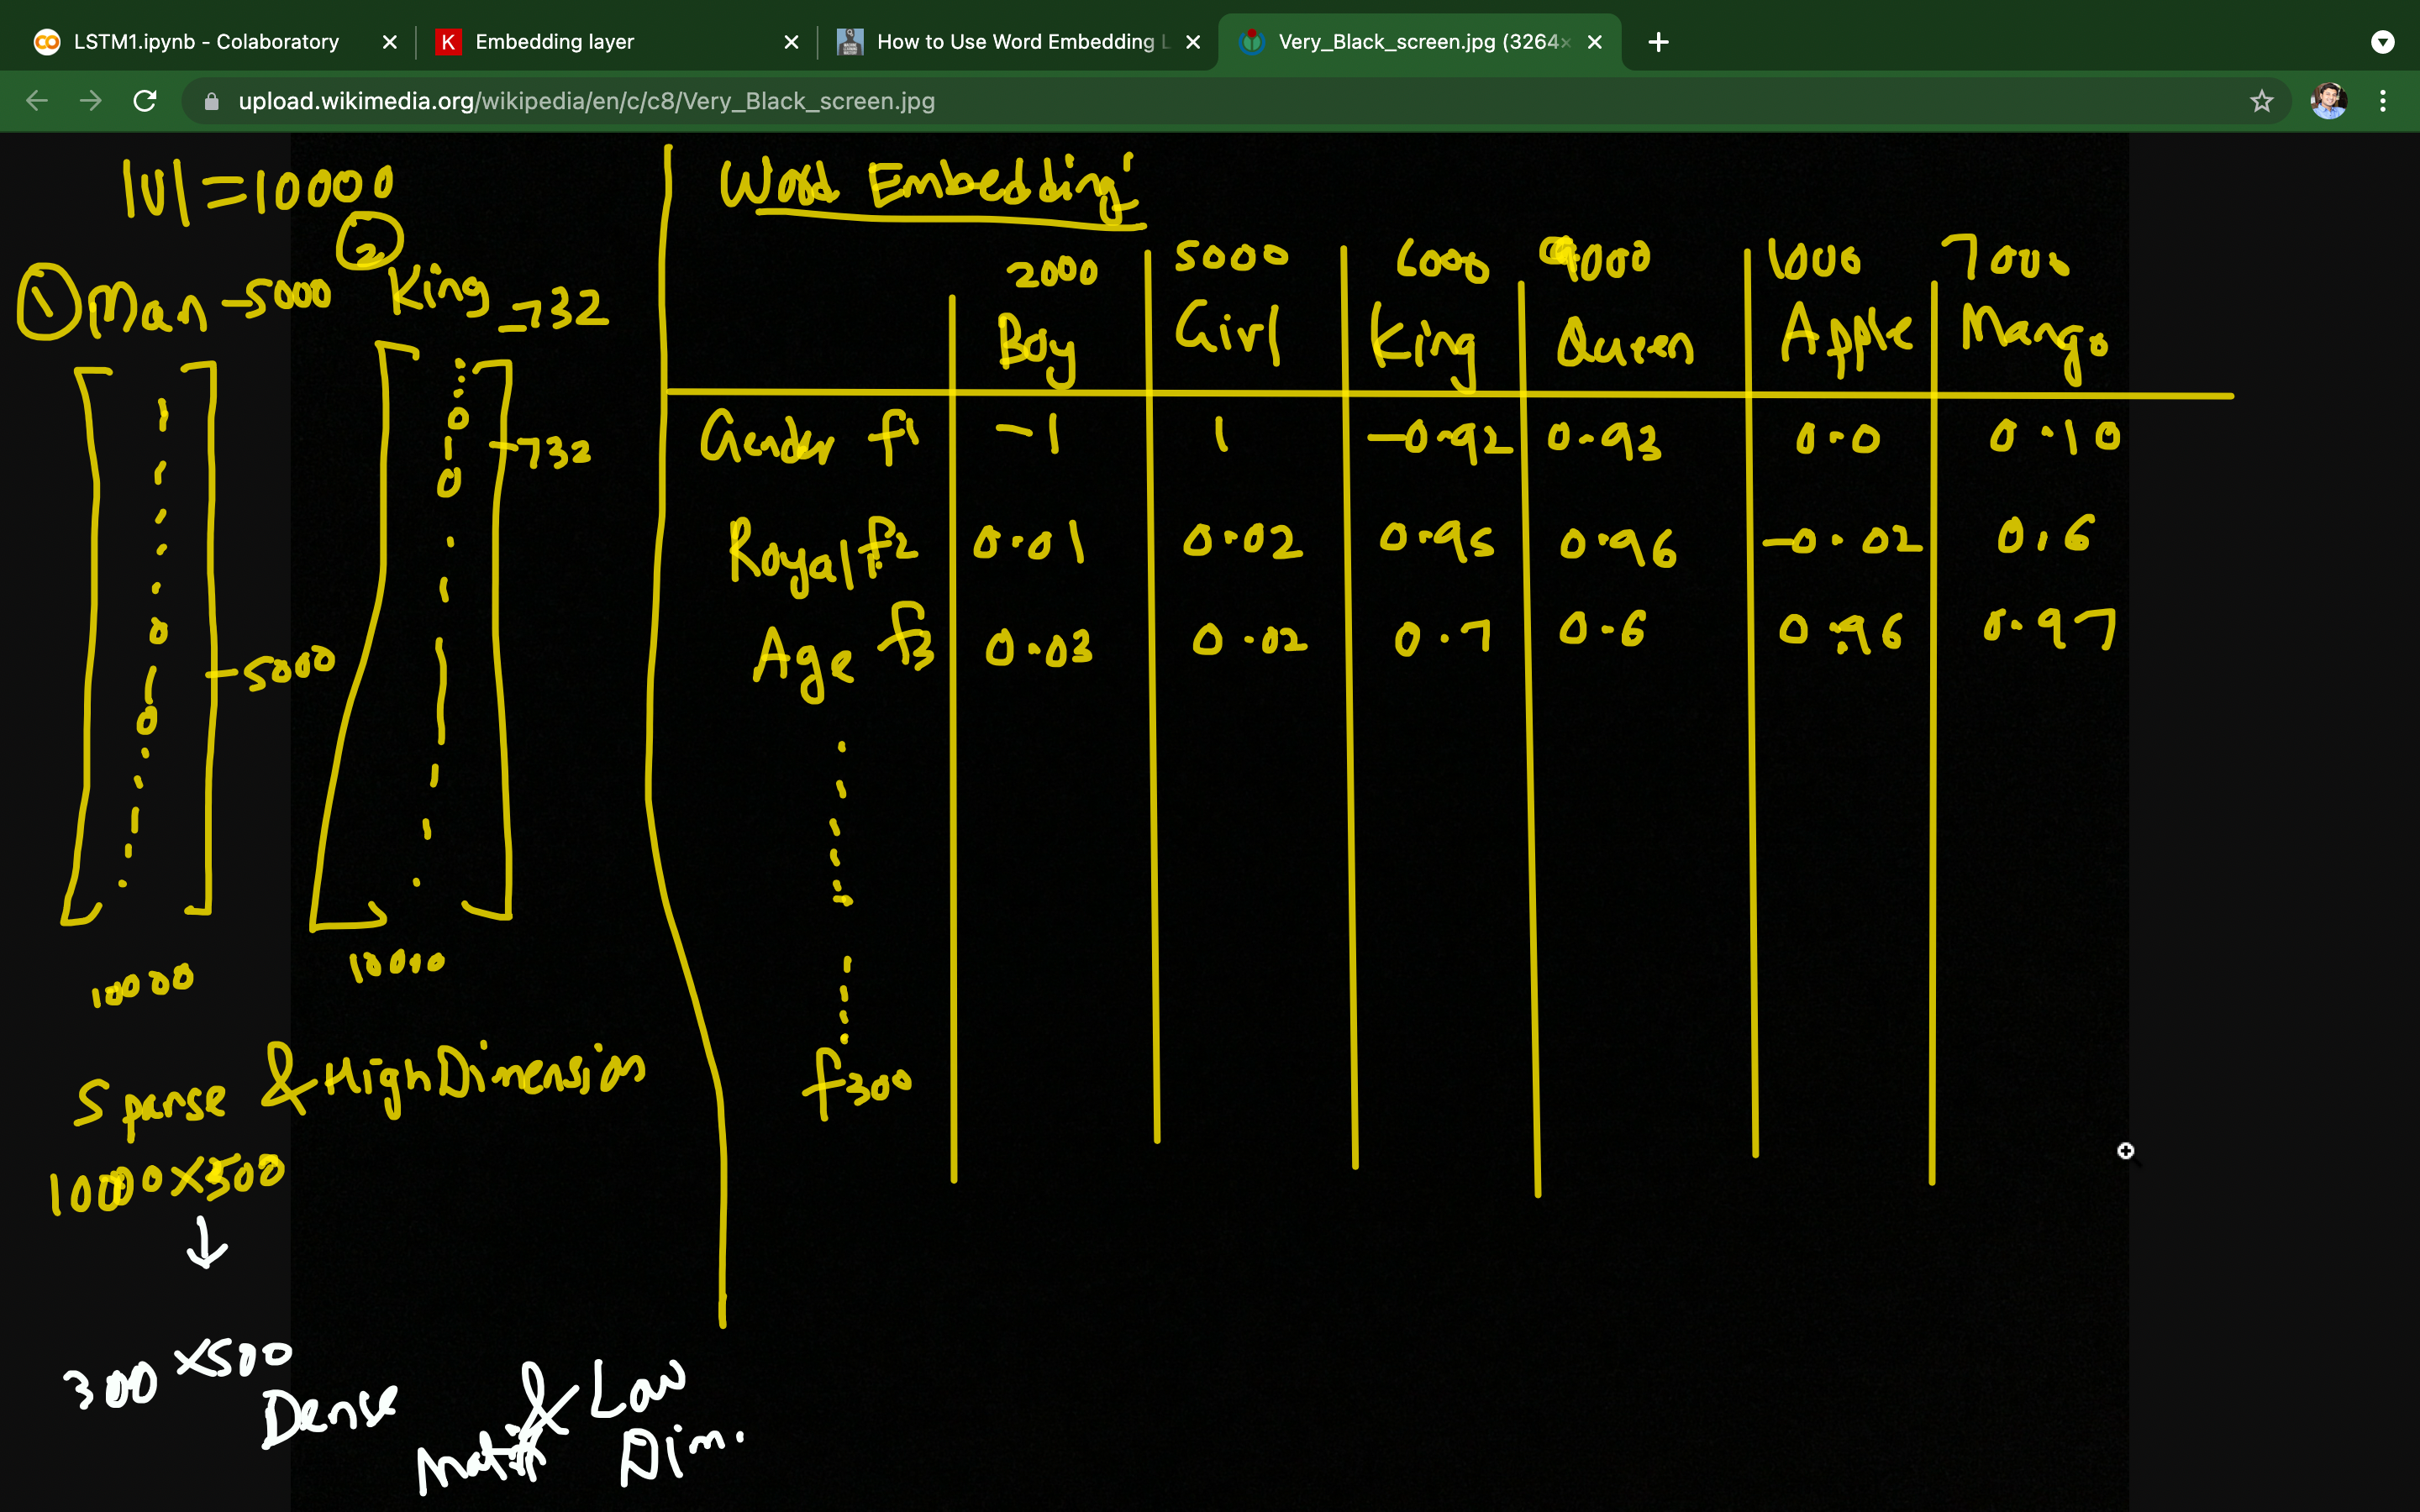

In [ ]:
# Call the function and compile the model.
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 150, 50)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out_layer (Dense)                    │ (None, 1)                   │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # Fit on the training data.
r = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
# r = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
#           validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=4)])
# https://keras.io/api/callbacks/early_stopping/
# https://stackoverflow.com/questions/50284898/keras-earlystopping-which-min-delta-and-patience-to-use

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8293 - loss: 0.4457 - val_accuracy: 0.9473 - val_loss: 0.2415
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9411 - loss: 0.2010 - val_accuracy: 0.9789 - val_loss: 0.1188
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9785 - loss: 0.0987 - val_accuracy: 0.9810 - val_loss: 0.0694
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9821 - loss: 0.0669 - val_accuracy: 0.9873 - val_loss: 0.0568
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9855 - loss: 0.0560 - val_accuracy: 0.9873 - val_loss: 0.0565
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9852 - val_loss: 0.0671


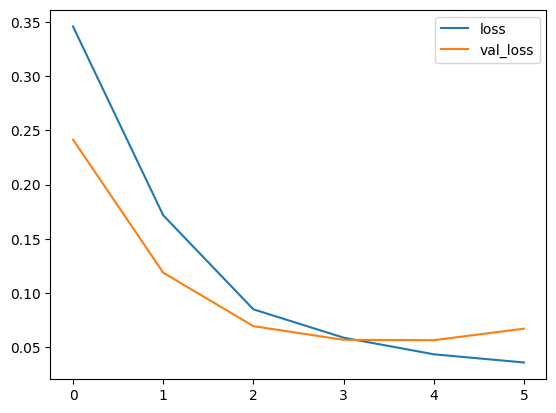

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

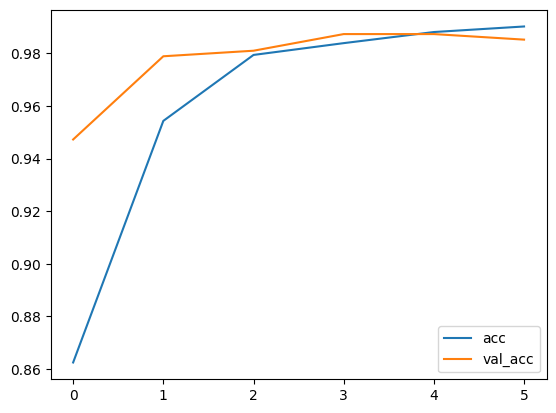

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The model performs well on the validation set and this configuration is chosen as the final model.


In [ ]:
X_test

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
                              ...                        
4339    I want to sent  &lt;#&gt; mesages today. Thats...
4865    Oh! Shit, I thought that was your trip! Looooo...
2043    4mths half price Orange line rental & latest c...
3855                     I'm ok. Will do my part tomorrow
1034    ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
Name: v2, Length: 836, dtype: object

In [ ]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
test_sequences_matrix

array([[  0,   0,   0, ...,  42,  96, 233],
       [  0,   0,   0, ...,  63,   5, 715],
       [  0,   0,   0, ...,  81,  10,   5],
       ...,
       [  0,   0,   0, ...,   2, 518,  21],
       [  0,   0,   0, ...,  11, 377, 158],
       [  0,   0,   0, ..., 869, 369,   6]], dtype=int32)

In [ ]:
test_sequences_matrix.shape

(836, 150)

In [ ]:
# Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9738 - loss: 0.0803


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.067
  Accuracy: 0.981


**Happy Learning**

## Another LSTM Case Study

https://www.kaggle.com/shahules/zomato-complete-eda-and-lstm-model

## Semantic_Processing_Word_Embedding

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


**Steps:**

1. Sentences

2. One Hot Representation - index from

3. One hot representation --> Embedding layer Keras to form Embedding Matrix

4. Embedding Matrix:
 vocabulary_size = 10000
 dimensions = 10



In [ ]:
# sentences

sent = [
        'the glass of milk',
        'the glass of juice',
        'the cup of tea',
        'I am a good boy',
        'I am a good developer',
        'understand the meaning of words',
        'your videos are good'
]

In [ ]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [ ]:
# Vocabulary size
voc_size = 10000 # assumption

**One Hot Representation**

In [ ]:
from tensorflow.keras.preprocessing.text import  one_hot

In [ ]:
onehot_repr = [ one_hot(words, voc_size) for words in sent ]
print(onehot_repr)

[[5584, 2020, 4431, 3322], [5584, 2020, 4431, 7668], [5584, 9432, 4431, 1993], [5474, 3856, 926, 7171, 9387], [5474, 3856, 926, 7171, 3973], [6007, 5584, 1815, 4431, 512], [7969, 5022, 2604, 7171]]


Note: All the above numbers will be less than 10000.

[6753, 8640, 7511, 7085] --> 'the glass of milk'

[6753, 8640, 7511, 6952] --> 'the glass of juice'

Observe in the above two sentences all indexes of the words match except milk and juice and that is pretty obvious.

In [ ]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

**Word Embedding Representation**

Lets form an Embedding Matrix. It will look something as below:

Therefore, total number of features/dimensions = 5

However, we will select dimensions as 10.

In [ ]:
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
import numpy as np

In [ ]:
sent_length = 8

embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 5584 2020 4431 3322]
 [   0    0    0    0 5584 2020 4431 7668]
 [   0    0    0    0 5584 9432 4431 1993]
 [   0    0    0 5474 3856  926 7171 9387]
 [   0    0    0 5474 3856  926 7171 3973]
 [   0    0    0 6007 5584 1815 4431  512]
 [   0    0    0    0 7969 5022 2604 7171]]


In [ ]:
dim = 10

In [ ]:
model = Sequential()
model.add(Embedding(voc_size, 10, input_length=sent_length))
# model.add(Embedding(size_of_vocabulary, number_of_dimensions, input_length=sentence_length))
model.compile('adam','mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Lets now see, how our words are converted into featurized vectors.

In [ ]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [ ]:
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
[[[-0.02232206 -0.03070209  0.04933939 -0.00659474  0.03709466
    0.04585503  0.02208823 -0.00979978 -0.04549651  0.01243292]
  [-0.02232206 -0.03070209  0.04933939 -0.00659474  0.03709466
    0.04585503  0.02208823 -0.00979978 -0.04549651  0.01243292]
  [-0.02232206 -0.03070209  0.04933939 -0.00659474  0.03709466
    0.04585503  0.02208823 -0.00979978 -0.04549651  0.01243292]
  [-0.02232206 -0.03070209  0.04933939 -0.00659474  0.03709466
    0.04585503  0.02208823 -0.00979978 -0.04549651  0.01243292]
  [ 0.04680533  0.0062474   0.02316742  0.00335282  0.0233449
   -0.00095723  0.03788222 -0.01757361 -0.0399333   0.01575441]
  [ 0.0052888   0.0269484   0.0015967  -0.01055677  0.03204042
    0.0149301  -0.03836077 -0.01132978  0.04113397 -0.02533218]
  [ 0.04899495 -0.00813965 -0.01667478  0.04097554 -0.03997755
    0.02266215  0.03883082  0.01235561 -0.01355163 -0.04658563]
  [-0.03484512  0.0315689   0.03487939  0.00244175 -0.04151288
   -0.0166

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0, 5584, 2020, 4431, 3322], dtype=int32)

In [ ]:
len(embedded_docs[0])

8

In [ ]:
model.predict(embedded_docs)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[-0.02232206, -0.03070209,  0.04933939, -0.00659474,  0.03709466,
         0.04585503,  0.02208823, -0.00979978, -0.04549651,  0.01243292],
       [-0.02232206, -0.03070209,  0.04933939, -0.00659474,  0.03709466,
         0.04585503,  0.02208823, -0.00979978, -0.04549651,  0.01243292],
       [-0.02232206, -0.03070209,  0.04933939, -0.00659474,  0.03709466,
         0.04585503,  0.02208823, -0.00979978, -0.04549651,  0.01243292],
       [-0.02232206, -0.03070209,  0.04933939, -0.00659474,  0.03709466,
         0.04585503,  0.02208823, -0.00979978, -0.04549651,  0.01243292],
       [ 0.04680533,  0.0062474 ,  0.02316742,  0.00335282,  0.0233449 ,
        -0.00095723,  0.03788222, -0.01757361, -0.0399333 ,  0.01575441],
       [ 0.0052888 ,  0.0269484 ,  0.0015967 , -0.01055677,  0.03204042,
         0.0149301 , -0.03836077, -0.01132978,  0.04113397, -0.02533218],
       [ 0.04899495, -0.00813965, -0.01667478,  0.04097554, -0.03997755,
         0.02266215,  0.03883082,  0.01235561

In [ ]:
(model.predict(embedded_docs)[0]).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


(8, 10)

**This we see that each word is converted into 10 features.**

# Happy Learning